In [7]:
from WDeversion_theory_methods.wd_2D_functions import *

plot_folder = '../analysis/plots/'
os.makedirs(plot_folder,exist_ok=True)

global_path = ".."
scale_file = global_path + "/data/segmented_curves/Pixelscales.pkl"

file : ../raw_data/segmented_curves/Across_DV_ecadGFPnbG4_pouchShape.pkl
crosssection is Across DV
file : ../raw_data/segmented_curves/Along_DV_ecadGFPnbG4_pouchShape.pkl
crosssection is Along DV
file : ../raw_data/segmented_curves/Across_DV_ecadGFPnbG4myoVI_pouchShape.pkl
crosssection is Across DV
file : ../raw_data/segmented_curves/Along_DV_ecadGFPnbG4myoVI_pouchShape.pkl
crosssection is Along DV


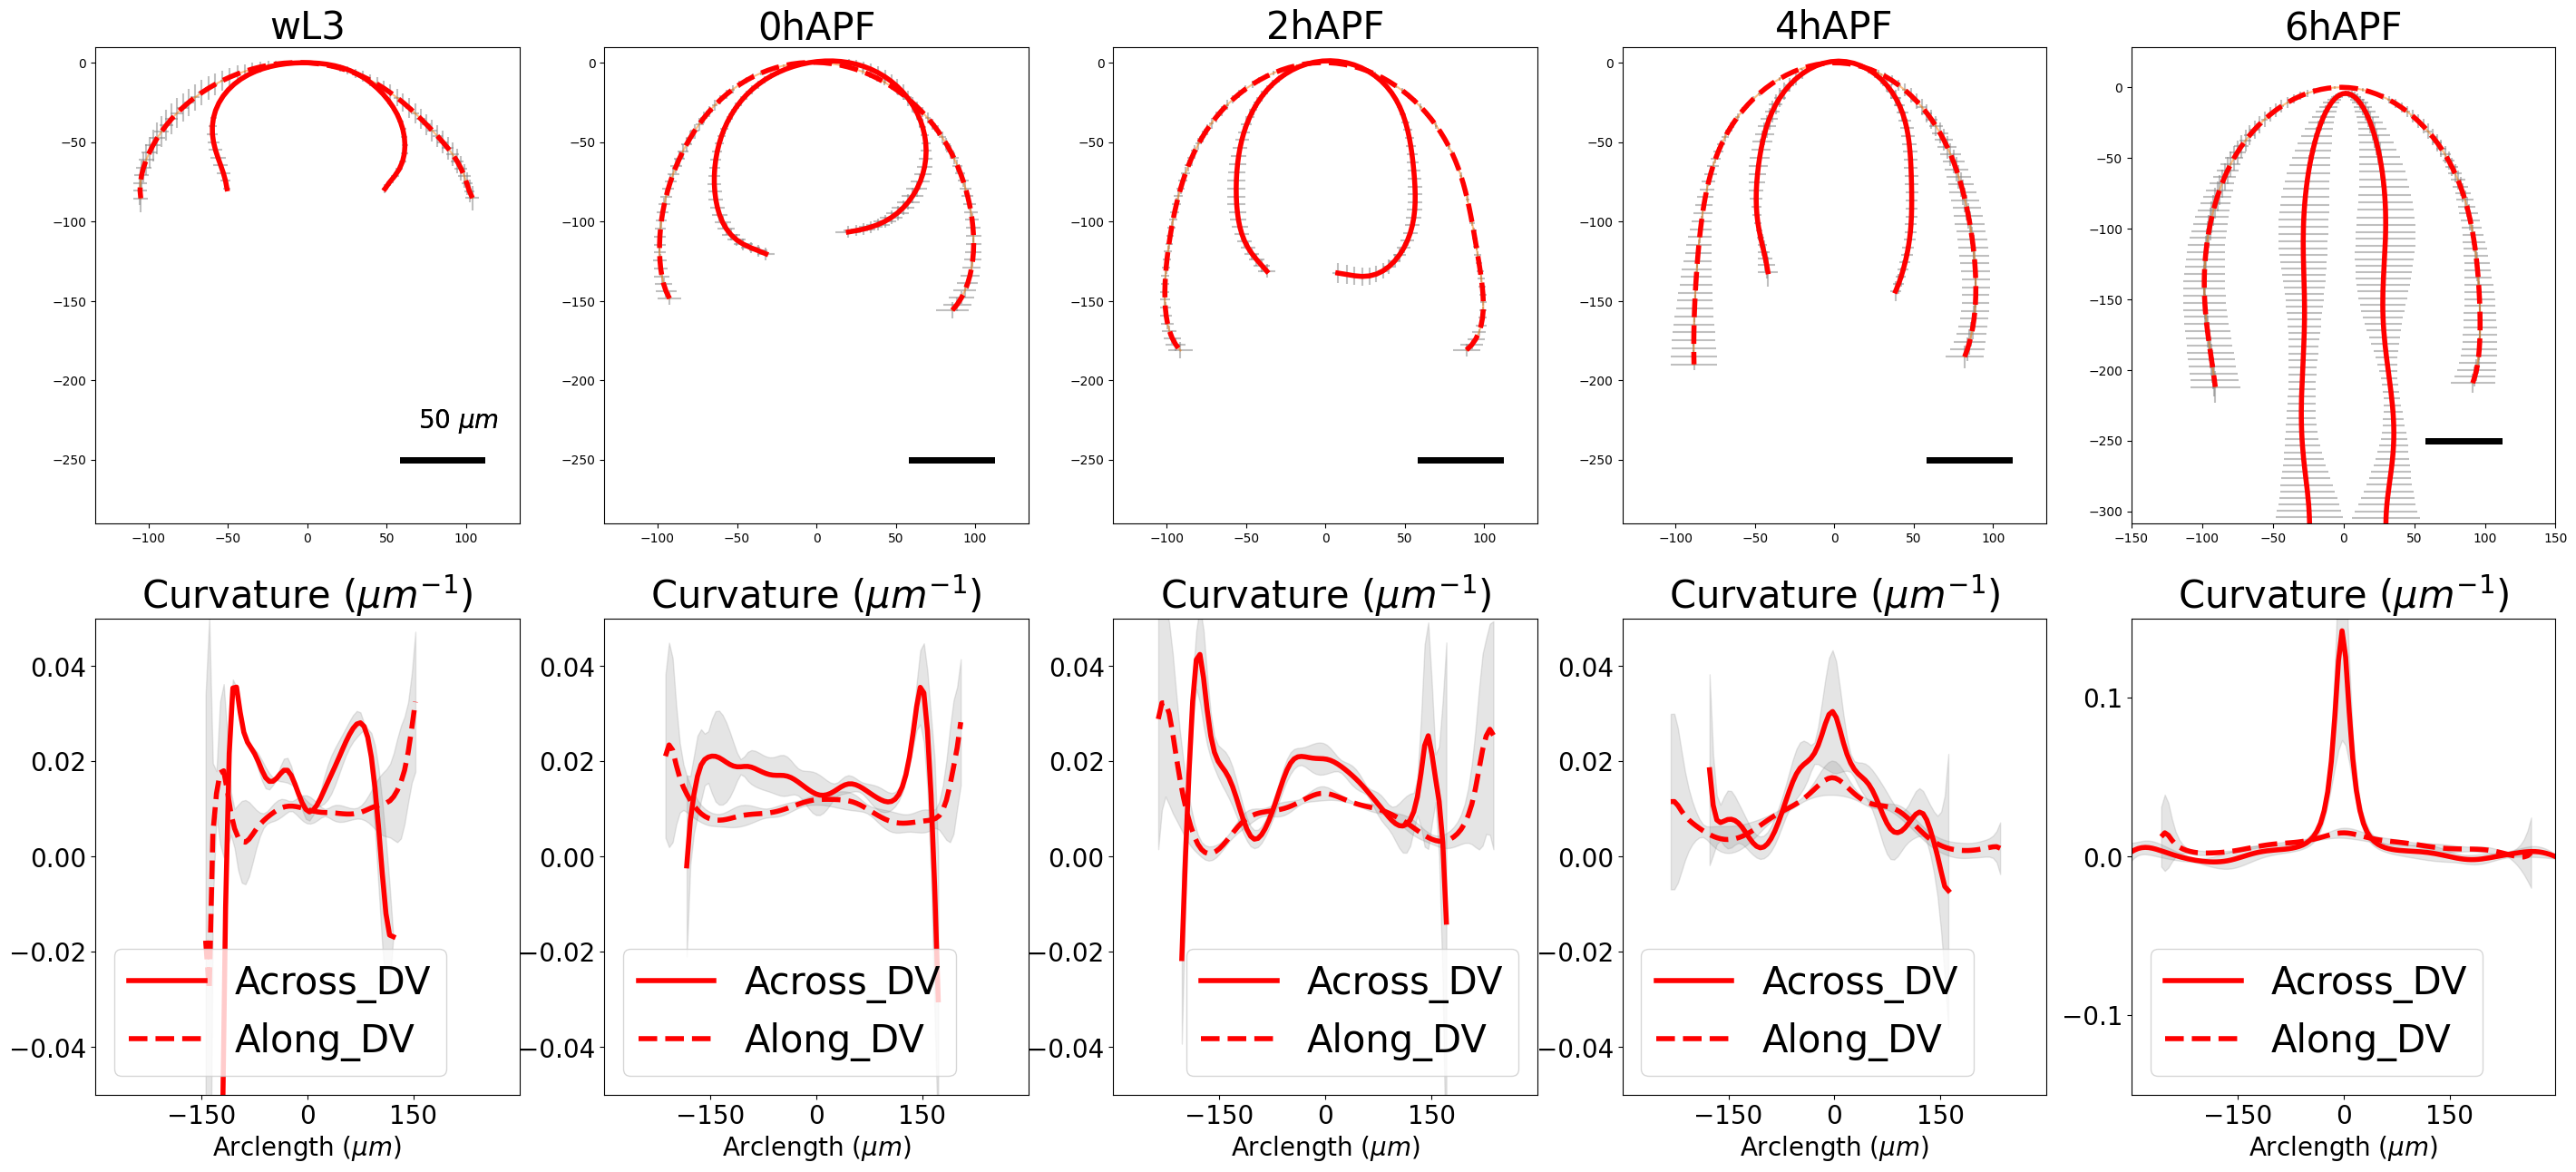

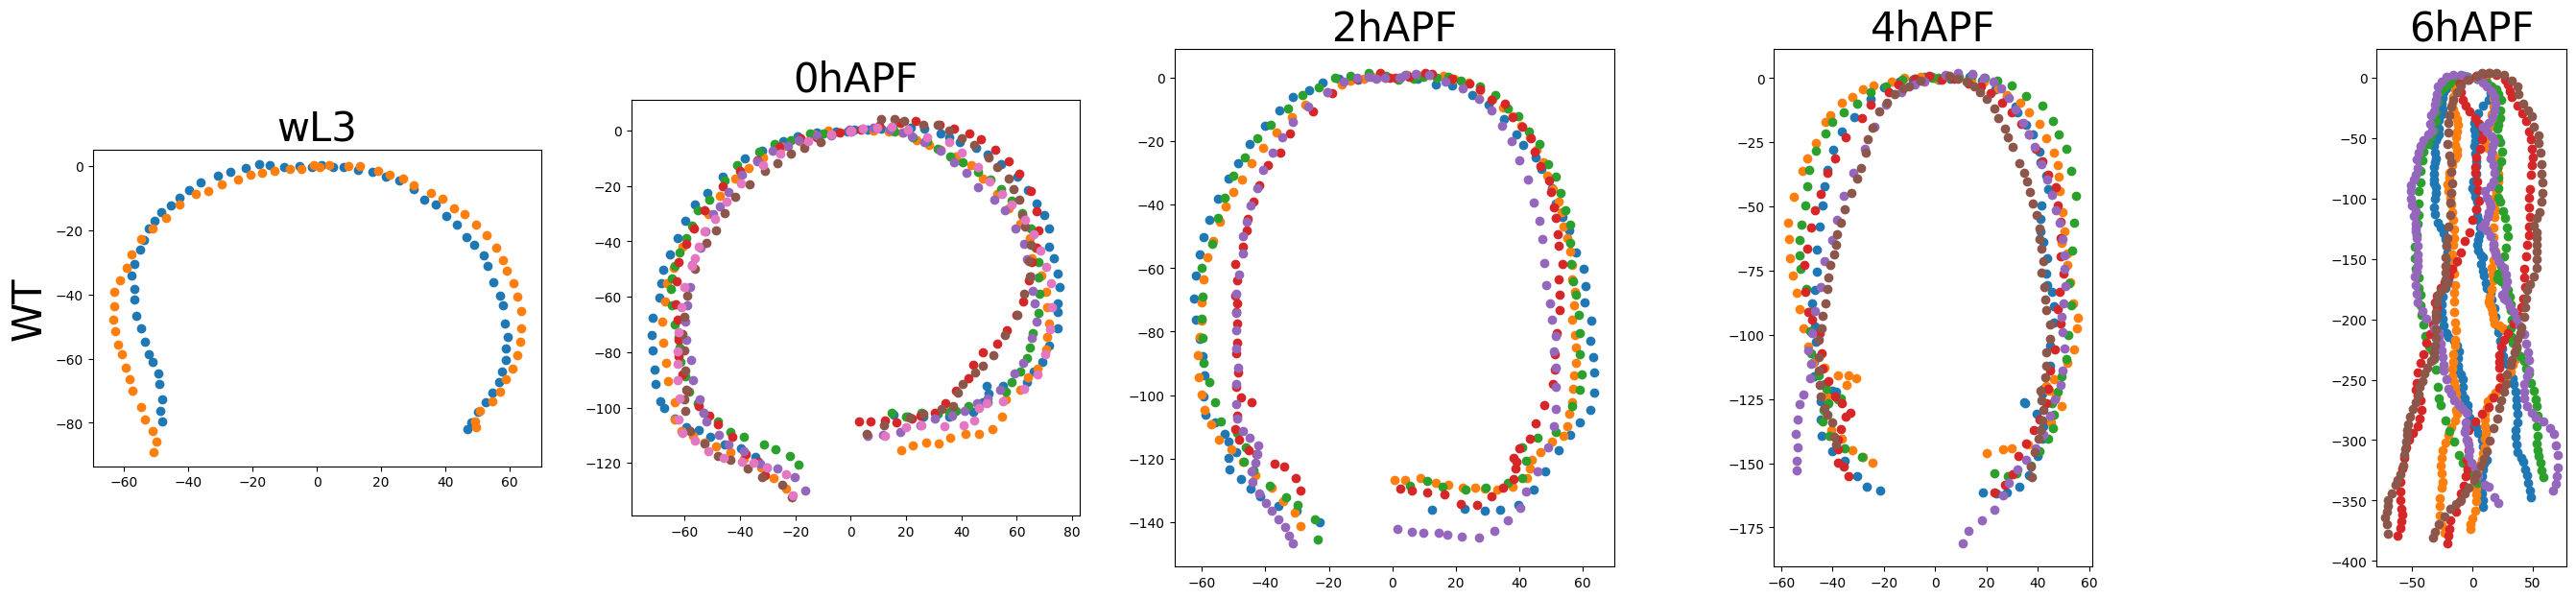

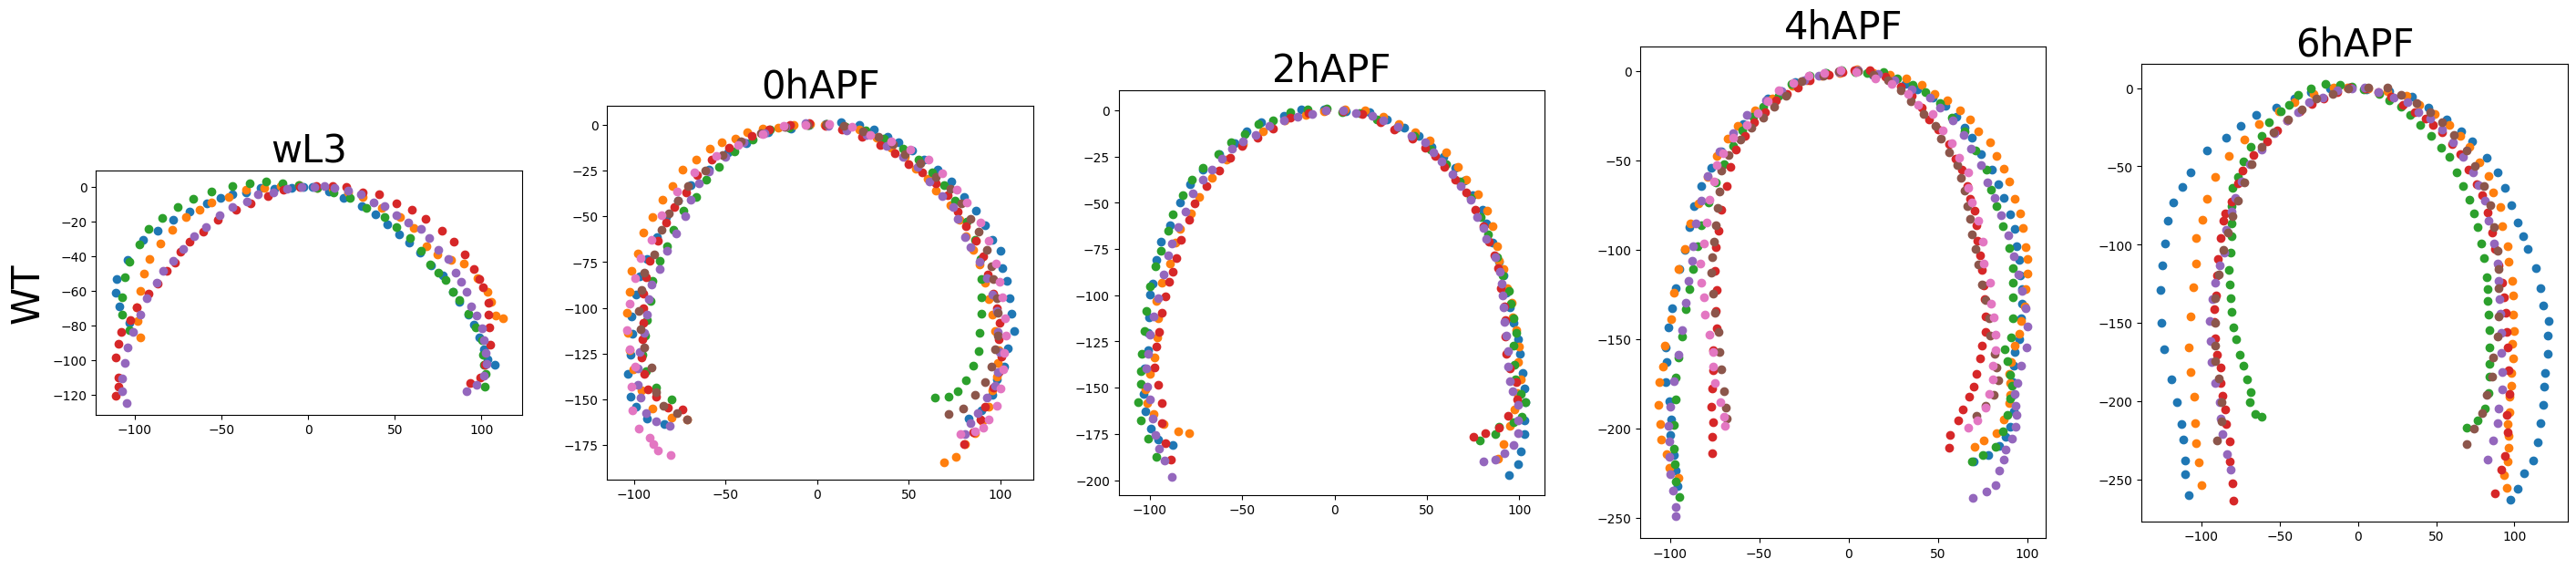

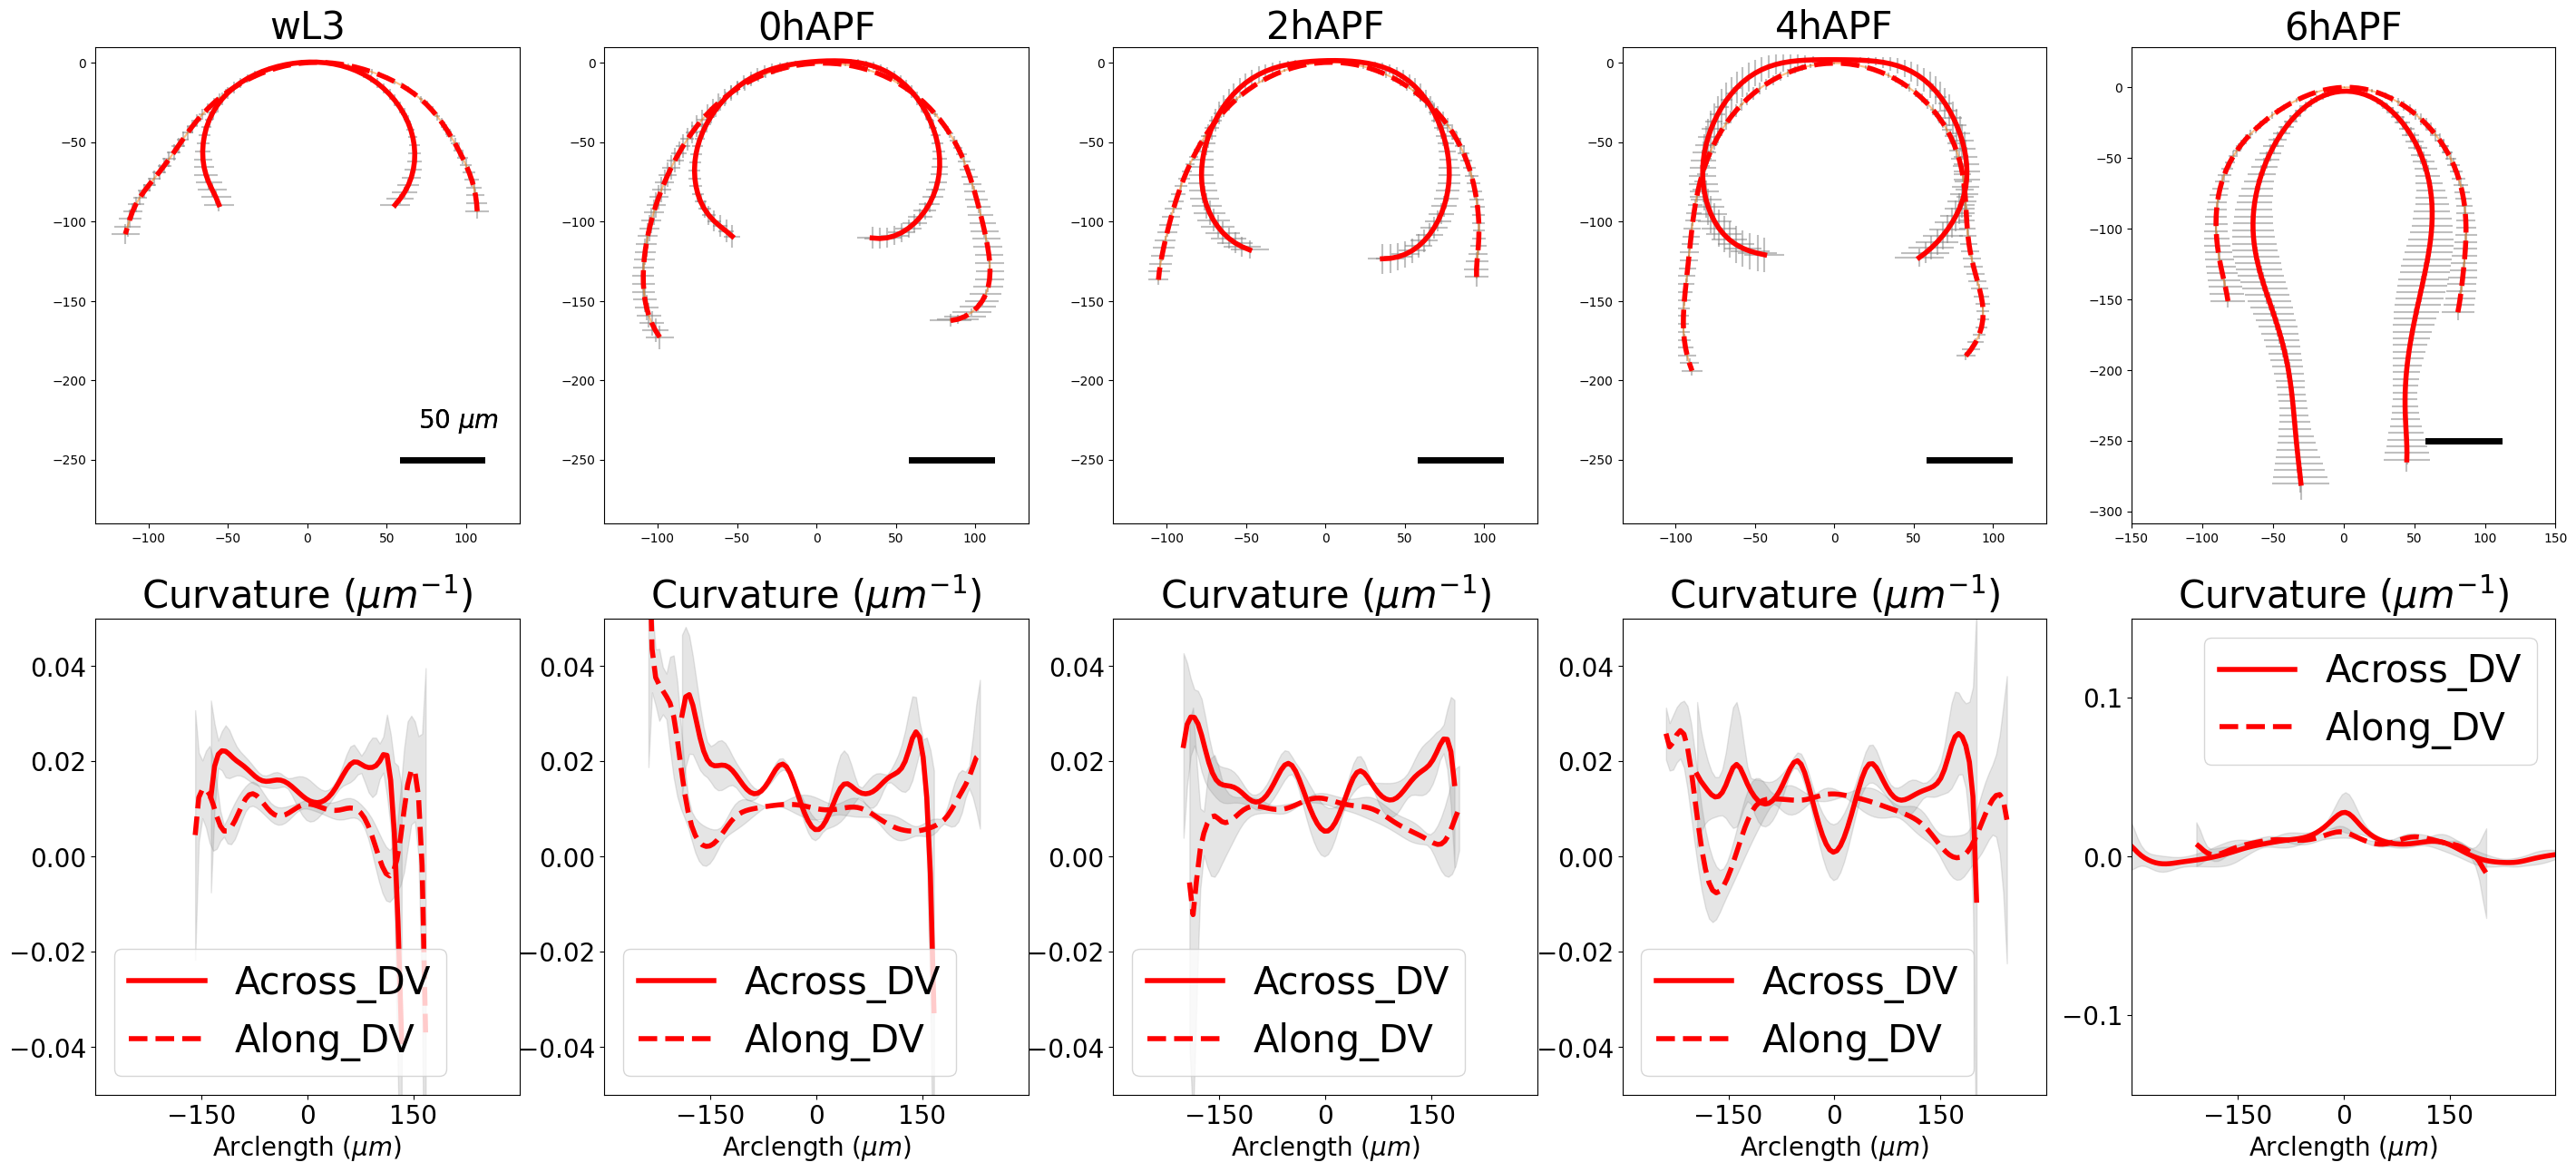

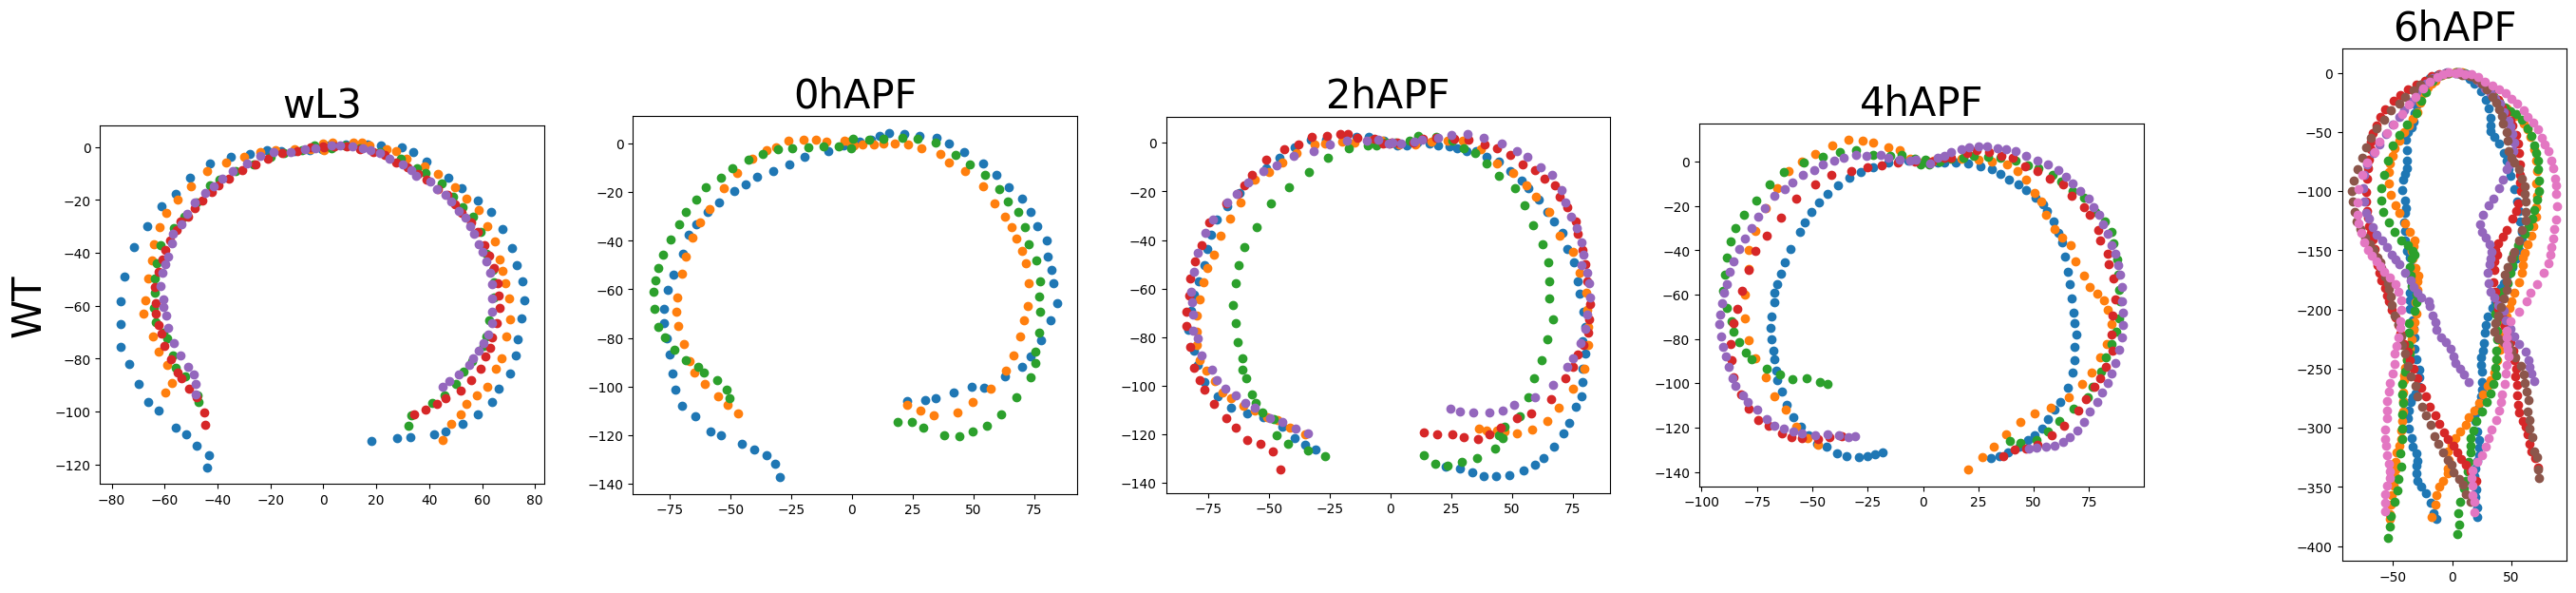

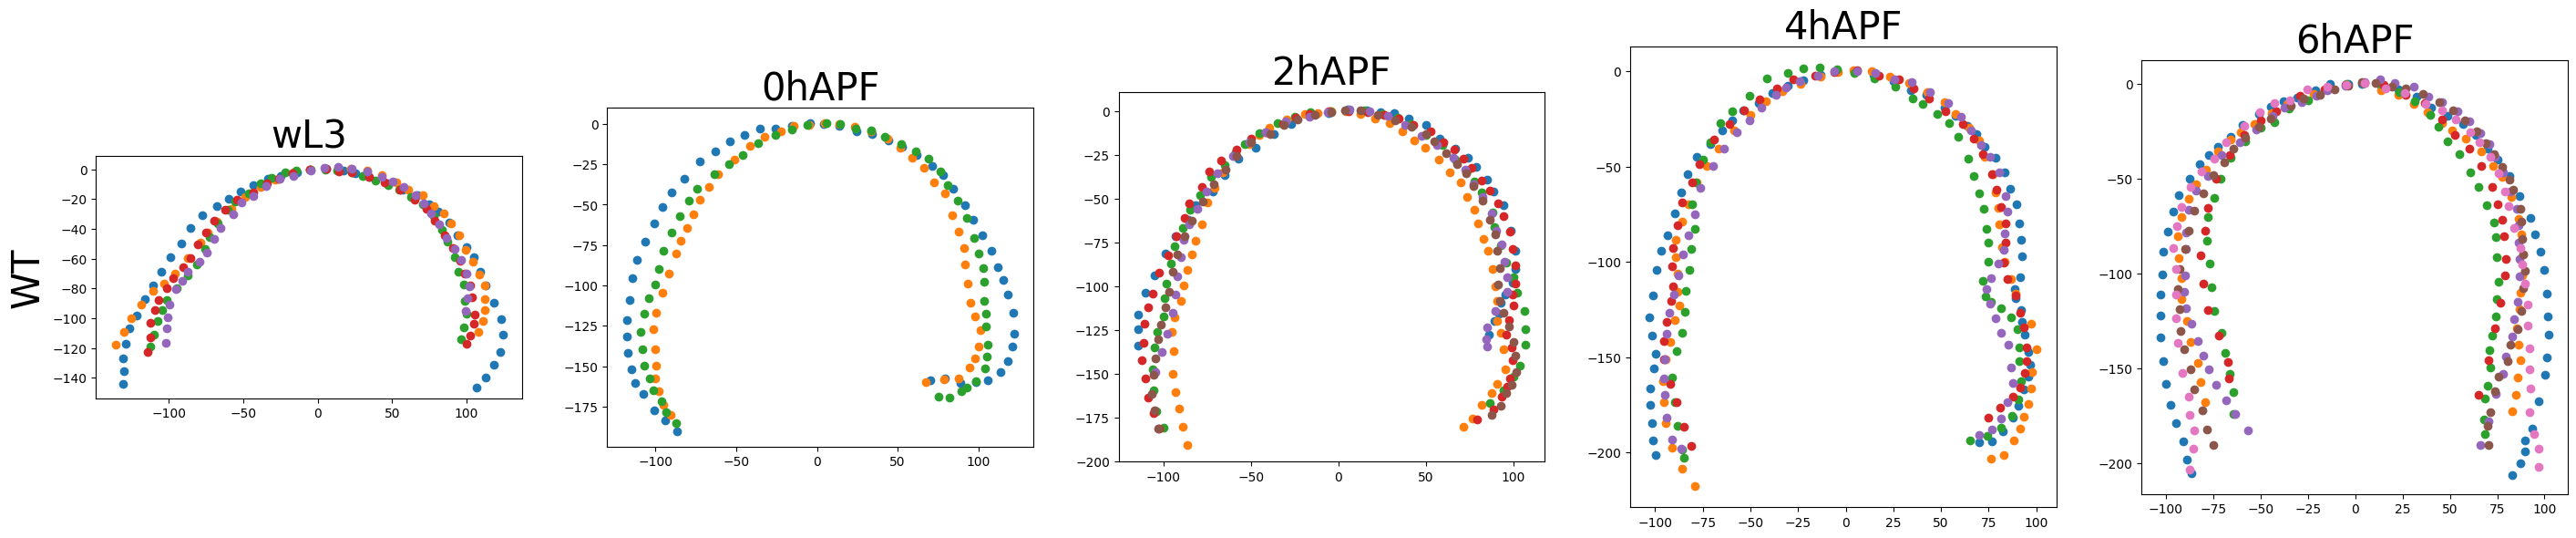

In [8]:
genotypes = ["ecadGFPnbG4", 
             "ecadGFPnbG4myoVI"
            ]
crosssections = ["Across_DV",
                 "Along_DV", 
                ]

devstage_name_update_dict = {
    "120hAEL":"120hAEL",
    "96hAEL":"96hAEL",
    "upcrawling":"wL3",
    "whitePupa" : "0hAPF",
    "2hAPF": "2hAPF",
    "4hAPF": "4hAPF",
    "6hAPF": "6hAPF",
}

devstages = ['wL3', '0hAPF', '2hAPF', '4hAPF','6hAPF']
#devstages = ['wL3', '4hAPF']

#fig, axs = plt.subplots(2, len(devstages), figsize=(7*len(devstages), 15))

for genotype in genotypes:
    fig, axs = plt.subplots(2, len(devstages), figsize=(7*len(devstages), 15))
    
    for crosssection in crosssections:
        
        file = global_path + '/data/segmented_curves/' + crosssection + "_" + genotype + "_pouchShape.pkl"
        
        #files = ['../exp_data/segmented_curves/along_DV_pouchShape_ecadGFPnbG4.pkl'] #Along DV
        #files = ['../exp_data/segmented_curves/ecadGFPnbG4pouchShape.pkl'] #Across DV
        #files = ['shapes.csv']

        
        #devstages = ['upcrawling', 'whitePupa', '2hAPF', '4hAPF','6hAPF']
        allcurves = import_raw_crosssection_points(files = [file], plot = False, scale_file=scale_file)
        #allcurves = allcurves[allcurves["genotype"] == genotype]


        #updating name of devstages


        allcurves["devstage"] = allcurves.apply(lambda row: devstage_name_update_dict[row["devstage"]], axis = 1) #[devstage_name_update[x] for x in allcurves["devstage"].values]
        



        #fig, axs = plt.subplots(2, len(devstages), figsize=(7*len(devstages), 15))


        # align
        allcurves = align_curves(allcurves = allcurves, genotypes = [genotype],orientation = 'horizontal', devstages=devstages, filename  = plot_folder + genotype + "_" + crosssection + '_aligned.pdf'
                                )
        
        #interpolate
        [df_all, df_mean] = interpolate_average_curves(allcurves, genotypes = [genotype], devstages=devstages,)
        
        df_all["crosssection"] = crosssection
        df_mean["crosssection"] = crosssection


        #save csv
        df_all.to_csv(file.replace(".pkl", "_interpolated_all.csv"), index = False)
        df_mean.to_csv(file.replace(".pkl", "_interpolated_mean.csv"), index = False)

        #plotting
        scalebar_stage = "wL3"
        scalebar_x_pos = 60
        scalebar_y_pos = -250
        scalebar_size = 50
        scalebar_linewidth = 5
        scalebar_fontsize = 20
        scalebar_color = 'black'

        for j in range(len(devstages)):

            devstage = devstages[j]

            df = df_mean[((df_mean['genotype'] == genotype) & (df_mean['devstage'] == devstage)) & (df_mean['crosssection'] == crosssection)]
            #gen_dev = database[(database['genotype'] == genotype) & (database['devstage'] == devstage)]

            #plot mean curve

            #linestyle
            if crosssection == "Across_DV":
                linestyle = "-"
            else:
                linestyle = "--"


            ax = axs[0, j] #axs[j, 0]
            ax.axis("equal")
            ax.set_ylim(-290, 10)
            ax.set_xlim(-150, 150)
            ax.plot(df['x'], df['y'],color = 'red',linewidth = 4, label = 'Mean', zorder = 2, linestyle = linestyle)
            ax.errorbar(df['x'], df['y'], xerr = df['x_sd'], yerr = df['y_sd'],ecolor = 'gray', alpha = 0.5, label = 'Std dev', zorder = 1)
            #ax.fill_between(df['x'], df['curvature'] - df['curvature_sd'], df['curvature'] + df['curvature_sd'], color = 'gray', alpha = 0.2)

            #ax.set_ylabel(devstage, fontsize = 30, rotation = 0, labelpad = 100)


            #adding scale bar
            ax.plot([scalebar_x_pos, scalebar_x_pos + scalebar_size],[scalebar_y_pos,scalebar_y_pos], lw = scalebar_linewidth, color = scalebar_color)
            if devstage == scalebar_stage:
                ax.text(x = scalebar_x_pos + 10, y = scalebar_y_pos + 20, s = str(scalebar_size) + ' ' + r'$\mu m$', fontsize = scalebar_fontsize)


            #switching off ticks
            #ax.set_xticklabels([])
            #ax.set_yticklabels([])
            #ax.set_xticks([])
            #ax.set_yticks([])
            #ax.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

            #if j == 0:
            ax.set_title(devstage, fontsize = 30,)


            #plot mean curvature
            ax = axs[1, j]
            ax.set_ylim(-0.05, 0.05)
            ax.set_xlim(-300, 300)
            #ax.plot(df['arclength'],df['curvature'], color = 'black', alpha = 1,)
            ax.set_xlabel('Arclength ' + r'$(\mu m)$', fontsize = 20)
            #ax.set_ylabel('Curvature ' + r'$(\mu m^{-1})$', fontsize = 20, labelpad = 10)
            #ax.fill_between(df['arclength'], df['curvature'] - df['curvature_sd'], df['curvature'] + df['curvature_sd'], color = 'gray', alpha = 0.2)
            ax.fill_between(x = df['arclength'].tolist(), y1 = (df['curvature'] - df['curvature_sd']).tolist(), y2 = (df['curvature'] + df['curvature_sd']).tolist(), color = 'gray', alpha = 0.2)
            ax.plot(df['arclength'], df['curvature'], label = crosssection, linewidth = 4, color = 'red', linestyle = linestyle,
                   )


            #if j == 0:
            ax.set_title('Curvature ' + r'$(\mu m^{-1})$', fontsize = 30)
            ax.set_xticks([-150, 0, 150])
            if devstage == '6hAPF':
                #if max(df['curvature']) > 0.02:
                #ax.set_ylim(-1.1*max(df['curvature'] + df['curvature_sd']),1.1*max(df['curvature'] + df['curvature_sd']))
                ax.set_ylim(-0.15, 0.15)
                ax.set_yticks([-0.1, 0, 0.1])
            else:
                ax.set_yticks([-0.04, -0.02, 0, 0.02, 0.04])
            #ax.tick_params(axis = 'both', which = 'both', fontsize = 20)
            ax.tick_params(axis = 'both', labelsize = 20)
            ax.grid()
            
            ax.legend(fontsize = 30)

            
fig.savefig(plot_folder + "supplementary_"+ genotype+".png", bbox_inches = "tight")

# N for each stage

In [10]:
crosssection = "Across_DV"
genotypes = ["ecadGFPnbG4", "ecadGFPnbG4myoVI"]

for genotype in genotypes:

    print("genotype: ", genotype)

    file = global_path + '/data/segmented_curves/' + crosssection + "_" + genotype + "_pouchShape.pkl"
    df_all = pd.read_csv(file.replace(".pkl", "_interpolated_all.csv"))

    temp = df_all.groupby(["devstage", "crosssection", "disc"]).nth(0).reset_index()
    print(temp.groupby(["devstage", "crosssection"]).agg("size"))

genotype:  ecadGFPnbG4
devstage  crosssection
0hAPF     Across_DV       7
2hAPF     Across_DV       5
4hAPF     Across_DV       6
6hAPF     Across_DV       6
wL3       Across_DV       2
dtype: int64
genotype:  ecadGFPnbG4myoVI
devstage  crosssection
0hAPF     Across_DV       3
2hAPF     Across_DV       5
4hAPF     Across_DV       5
6hAPF     Across_DV       7
wL3       Across_DV       5
dtype: int64


## Computing average curvature

for Across_DV, mean curvature is 0.014685260662917244 um^-1
for Along_DV, mean curvature is 0.010031270027907676 um^-1
for both crosssections combined, mean curvature is 0.01231435977338407 um^-1 
Hence, average radius of curvature is 81.20600814029922 um


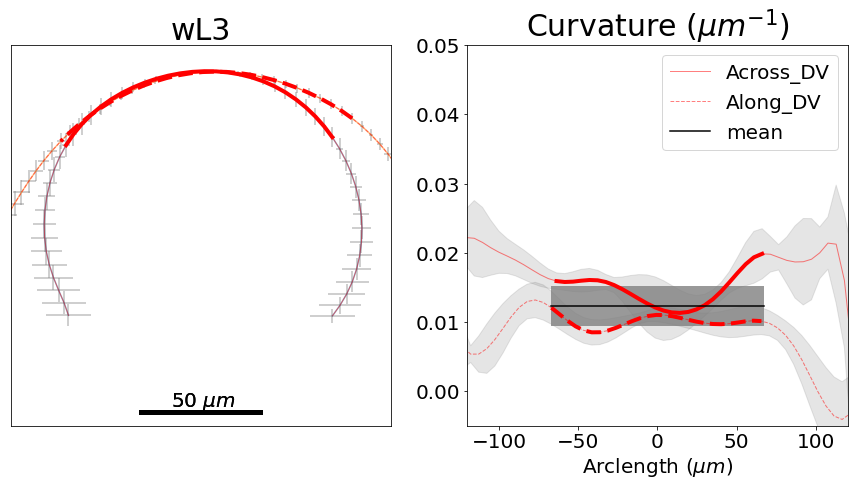

In [ ]:
#df_all.to_csv(file.replace(".pkl", "_interpolated_all.csv"), index = False)
#df_mean.to_csv(file.replace(".pkl", "_interpolated_mean.csv"), index = False)
from matplotlib import patches

devstage = "wL3"

#df_stage = df_mean[((df_mean['genotype'] == genotype) & (df_mean['devstage'] == devstage))] # & (df_mean['crosssection'] == crosssection)

fig,axs = plt.subplots(1,2, figsize=(15, 7))
scalebar_size = 50
[scalebar_x_pos, scalebar_y_pos] = [-25,-125]

crosssections = ["Across_DV","Along_DV"]
[w_DV, p_max] = [15, 59.77]
arclength_thres = w_DV/2+p_max

curvatures = np.array([])

for crosssection in crosssections:
    
    file = global_path + '/data/segmented_curves/' + crosssection + "_" + genotype + "_pouchShape.pkl"
    df_all = pd.read_csv(file.replace(".pkl", "_interpolated_all.csv"))
    df_mean = pd.read_csv(file.replace(".pkl", "_interpolated_mean.csv"))
    
    df = df_mean[(df_mean["crosssection"] == crosssection) & (df_mean["devstage"] == devstage)]
    df_filter = df[np.abs(df["arclength"]) <= arclength_thres]
    curvatures = np.append(curvatures, df_filter["curvature"].values)
    [mean_stage_curvature,std_stage_curvature] = [np.mean(df_filter["curvature"]),np.std(df_filter["curvature"])]
    print(f"for {crosssection}, mean curvature is {mean_stage_curvature} um^-1")
    
    #plotting

    #linestyle
    if crosssection == "Across_DV":
        linestyle = "-"
    else:
        linestyle = "--"

    ax = axs[0] #axs[j, 0]
    #ax.axis('equal')
    ax.set_ylim(-130, 10)
    ax.set_xlim(-80, 80)
    ax.plot(df['x'], df['y'],color = 'red',linewidth = 1, label = 'Mean', zorder = 2, linestyle = linestyle, alpha = 0.5)
    ax.errorbar(df['x'], df['y'], xerr = df['x_sd'], yerr = df['y_sd'],ecolor = 'gray', alpha = 0.5, label = 'Std dev', zorder = 1)
    ax.plot(df_filter['x'], df_filter['y'],color = 'red',linewidth = 4, #label = 'Mean', 
            zorder = 3, linestyle = linestyle, alpha = 1)
    #ax.fill_between(df['x'], df['curvature'] - df['curvature_sd'], df['curvature'] + df['curvature_sd'], color = 'gray', alpha = 0.2)

    #ax.set_ylabel(devstage, fontsize = 30, rotation = 0, labelpad = 100)


    #adding scale bar
    ax.plot([scalebar_x_pos, scalebar_x_pos + scalebar_size],[scalebar_y_pos,scalebar_y_pos], lw = scalebar_linewidth, color = scalebar_color)
    #if devstage == scalebar_stage:
    ax.text(x = scalebar_x_pos + scalebar_size/4, y = scalebar_y_pos + 2, s = str(scalebar_size) + ' ' + r'$\mu m$', fontsize = scalebar_fontsize)


    #switching off ticks
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    #ax.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

    #if j == 0:
    ax.set_title(devstage, fontsize = 30,)


    #plot mean curvature
    ax = axs[1]
    ax.set_ylim(-0.005, 0.05)
    xlim = 120
    ax.set_xlim(-xlim, xlim)
    #ax.plot(df['arclength'],df['curvature'], color = 'black', alpha = 1,)
    ax.set_xlabel('Arclength ' + r'$(\mu m)$', fontsize = 20)
    #ax.set_ylabel('Curvature ' + r'$(\mu m^{-1})$', fontsize = 20, labelpad = 10)
    #ax.fill_between(df['arclength'], df['curvature'] - df['curvature_sd'], df['curvature'] + df['curvature_sd'], color = 'gray', alpha = 0.2)
    ax.fill_between(x = df['arclength'].tolist(), y1 = (df['curvature'] - df['curvature_sd']).tolist(), y2 = (df['curvature'] + df['curvature_sd']).tolist(), color = 'gray', alpha = 0.2)
    ax.plot(df['arclength'], df['curvature'], label = crosssection, linewidth = 1, color = 'red', linestyle = linestyle, alpha = 0.5)
    ax.plot(df_filter['arclength'], df_filter['curvature'], #label = crosssection, 
            linewidth = 4, color = 'red', linestyle = linestyle, alpha = 1)
    #plot mean curvature
    #ax.axhline(y = mean_stage_curvature, xmin = 0.5*(1-arclength_thres/xlim), xmax = 0.5*(1+arclength_thres/xlim), #xmin=0 corresponds to left of plot so xlim in our code
    #           color = "blue", linestyle = linestyle, alpha = 0.5)
    #rect = patches.Rectangle((-arclength_thres, mean_stage_curvature-std_stage_curvature), 2*arclength_thres, 2*std_stage_curvature, linewidth=0, facecolor='blue', alpha = 0.2)
    ## Add the patch to the Axes
    #ax.add_patch(rect)


    #if j == 0:
    ax.set_title('Curvature ' + r'$(\mu m^{-1})$', fontsize = 30)
    #ax.set_xticks([-150, 0, 150])
    #ax.tick_params(axis = 'both', which = 'both', fontsize = 20)
    ax.tick_params(axis = 'both', labelsize = 20)
    ax.grid()

    
    
    

mean_combined_curvature = np.mean(curvatures)
std_combined_curvature = np.std(curvatures)
print(f"for both crosssections combined, mean curvature is {mean_combined_curvature} um^-1 ")
print(f"Hence, average radius of curvature is {1/mean_combined_curvature} um")

ax.axhline(y = mean_combined_curvature, xmin = 0.5*(1-arclength_thres/xlim), xmax = 0.5*(1+arclength_thres/xlim), #xmin=0 corresponds to left of plot so xlim in our code
               color = "black", linestyle = "-", label = "mean")
rect = patches.Rectangle((-arclength_thres, mean_combined_curvature-std_combined_curvature), 2*arclength_thres, 2*std_combined_curvature, linewidth=0, facecolor='gray', alpha = 0.8)
# Add the patch to the Axes
ax.add_patch(rect)


ax.legend(fontsize = 20)


In [4]:
pd.read_pickle(scale_file)

,disc,pixel to micron
0,20201013_ecadGFPnbG4_upcrawling_disc3,0.4565
1,20201022_ecadGFPnbG4_2hAPF_disc1,0.4572
2,20201022_ecadGFPnbG4_2hAPF_disc2,0.4563
3,20201022_ecadGFPnbG4_2hAPF_disc3,0.4571
4,20201022_ecadGFPnbG4_2hAPF_disc4,0.4574
...,...,...
120,20210715_ecadGFPnbG4myoVI_2hAPF_disc2,0.4546
121,20210813_ecadGFPnbG4myoVI_96hAEL_disc3,0.4571
122,20210813_ecadGFPnbG4myoVI_96hAEL_disc4,0.4572
123,20210818_ecadGFPnbG4myoVI_96hAEL_disc1,0.4582
